## Exploratory Data Analysis

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat dataset
df = pd.read_csv("ObesityDataSet.csv")  # Ganti dengan path file Anda

In [3]:
# Menampilkan beberapa baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
# Menampilkan deskripsi data
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


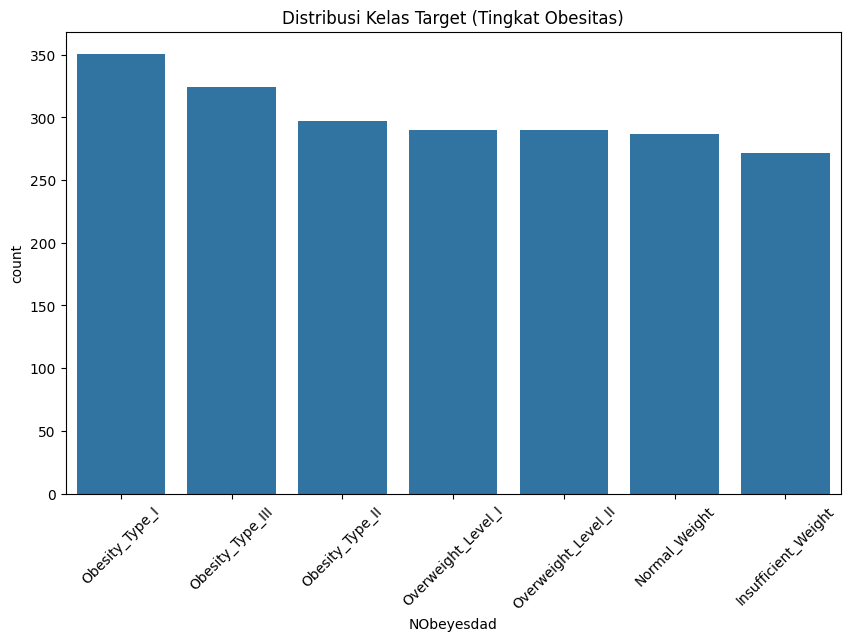

In [6]:
# Cek distribusi kelas
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.xticks(rotation=45)
plt.show()

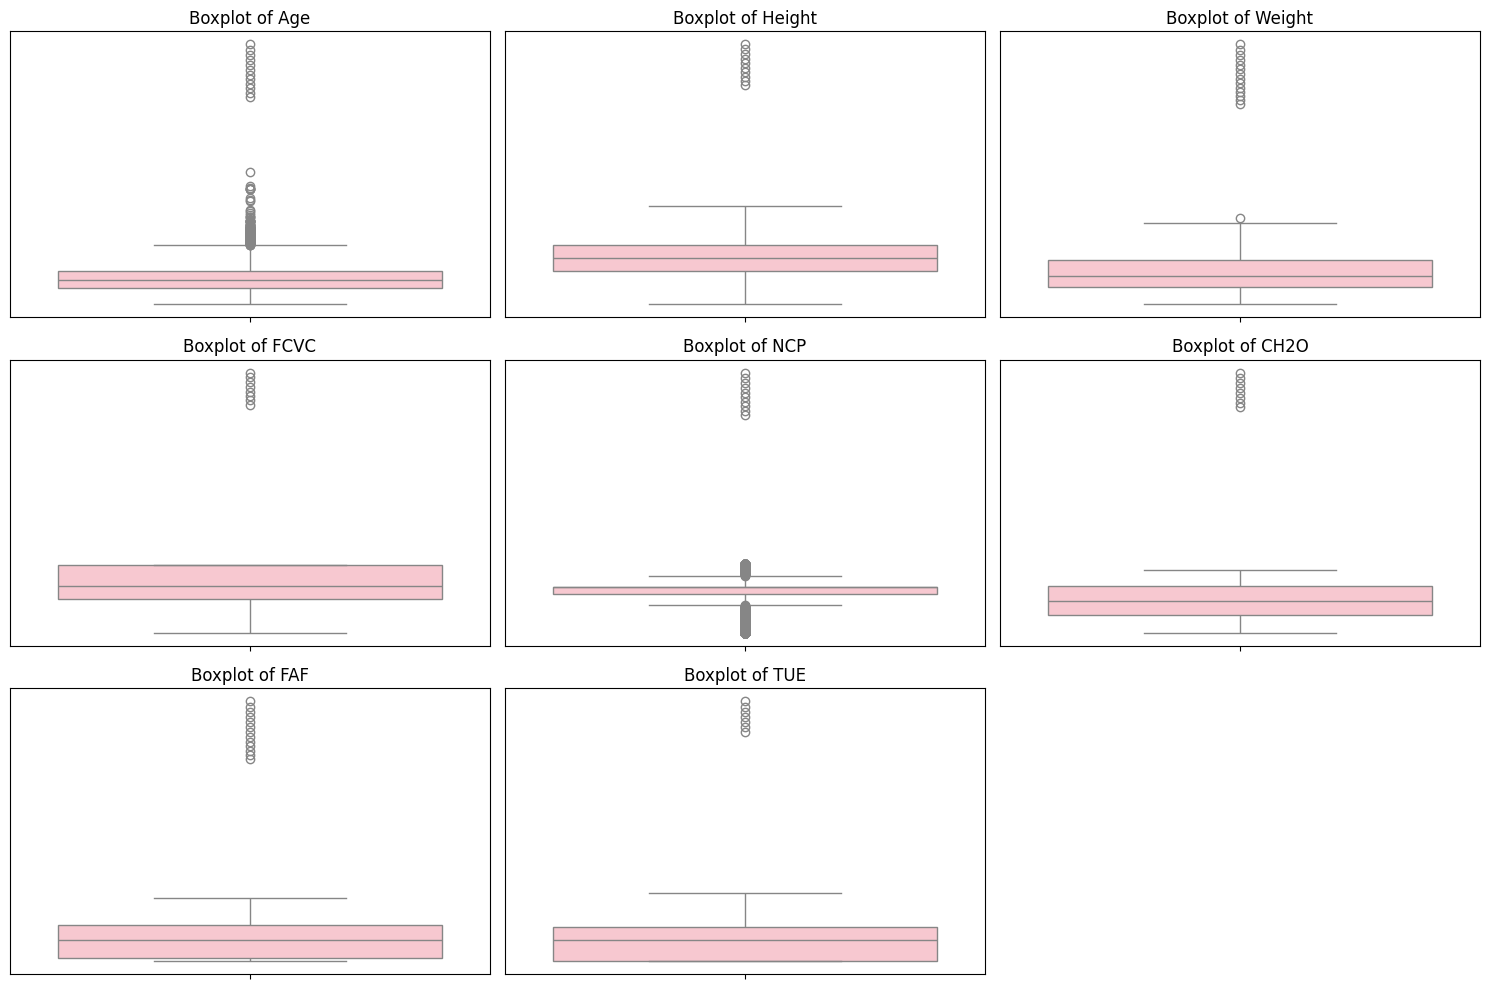

Jumlah outlier tiap kolom:
Age: 179
Height: 10
Weight: 15
FCVC: 8
NCP: 592
CH2O: 8
FAF: 13
TUE: 7


In [7]:
# Visualisasi outlier

# Pastikan kolom numerik dalam tipe float
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Inisialisasi dict untuk menyimpan jumlah outlier
outlier_counts = {}

# Visualisasi boxplot dan hitung outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.yticks([])
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot of {col}')

    # Hitung outlier berdasarkan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_counts[col] = len(outliers)

plt.tight_layout()
plt.show()

# Print jumlah outlier
print("Jumlah outlier tiap kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

In [8]:
df.shape

(2111, 17)

In [9]:
# Cek missing values
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [10]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(18)

In [11]:
# Tampilkan data duplikat
duplicates = df[df.duplicated()]
duplicates

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
663,21.0,Female,1.52,42.0,Sometimes,yes,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
763,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
764,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
824,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [12]:
# Cek nilai unik / unique values
df.nunique()

,0
Age,1393
Gender,3
Height,1561
Weight,1517
CALC,5
FAVC,3
FCVC,807
NCP,636
SCC,3
SMOKE,3


In [13]:
# Tampilkan nilai unik setiap fitur
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_vals)} nilai unik:")
    print(unique_vals)
    print("-" * 50)

Kolom 'Age' memiliki 1394 nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
--------------------------------------------------
Kolom 'Gender' memiliki 4 nilai unik:
['Female' 'Male' '?' nan]
--------------------------------------------------
Kolom 'Height' memiliki 1562 nilai unik:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
--------------------------------------------------
Kolom 'Weight' memiliki 1518 nilai unik:
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
--------------------------------------------------
Kolom 'CALC' memiliki 6 nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
--------------------------------------------------
Kolom 'FAVC' memiliki 4 nilai unik:
['no' 'yes' '?' nan]
--------------------------------------------------
Kolom 'FCVC' memiliki 808 nilai unik:
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665


## Kesimpulan Exploratory Data Analysis (EDA)

* **Pemuatan dan Gambaran Umum Data:** Dataset yang digunakan berhasil dimuat dan berisi informasi tentang faktor-faktor yang mempengaruhi tingkat obesitas. Terdapat 17 fitur dan 2111 baris data (setelah drop duplikat menjadi 2087 baris).
* **Tipe Data dan Missing Values:** Semua kolom memiliki tipe data yang sesuai dan tidak ditemukan adanya *missing values* secara eksplisit.
* **Distribusi Target (NObeyesdad):** Kolom target 'NObeyesdad' menunjukkan adanya *class imbalance*. Beberapa kelas seperti 'Obesity_Type_III' dan 'Normal_Weight' memiliki jumlah sampel yang signifikan, sementara kelas lain seperti 'Insufficient_Weight' dan 'Obesity_Type_I' memiliki jumlah yang lebih sedikit. Ini mengindikasikan perlunya penanganan *imbalance* pada tahap *preprocessing*.
* **Identifikasi Outlier:** Analisis boxplot dan perhitungan IQR menunjukkan keberadaan *outlier* pada beberapa kolom numerik seperti 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', dan 'TUE'. Kolom 'NCP' juga teridentifikasi memiliki nilai '?' yang perlu ditangani.
* **Duplikasi Data:** Ditemukan sejumlah 18 baris data duplikat yang telah berhasil dihapus, mengurangi total baris menjadi 2093.
* **Karakter Khusus pada Data Kategorial:** Beberapa kolom kategorial seperti 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'CALC', 'MTRANS', 'Gender' ditemukan memiliki nilai yang tidak konsisten (misalnya, '?' pada 'NCP') atau format penulisan yang bervariasi, yang memerlukan standarisasi pada tahap *preprocessing*.
* **Kesimpulan Umum EDA:** Data memiliki kualitas yang cukup baik dengan sedikit *missing values* eksplisit, namun memerlukan penanganan *outlier*, *class imbalance*, dan pembersihan data kategorial yang tidak konsisten sebelum digunakan untuk pemodelan.

## Preprocessing Data

In [14]:
# Import library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
import re
from collections import defaultdict, Counter
from imblearn.over_sampling import SMOTE

In [15]:
# Atasi missing values

# Mengganti '?' dengan NaN untuk kemudahan penanganan
df = df.replace('?', np.nan)

# Daftar kolom
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Pastikan semua kolom numerik bertipe float
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tangani khusus FCVC dan NCP dengan median karena ada outlier
df['FCVC'].fillna(df['FCVC'].median(), inplace=True)
df['NCP'].fillna(df['NCP'].median(), inplace=True)

# Kolom numerik lainnya imputasi dengan mean
for col in numerical_cols:
    if col not in ['FCVC', 'NCP']:
        df[col].fillna(df[col].mean(), inplace=True)

# Imputasi kolom kategorikal dengan modus
for col in categorical_cols:
    df[col] = df[col].astype(str)  # konversi ke string untuk jaga-jaga
    df[col].replace('nan', np.nan, inplace=True)
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-15-2295595451>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FCVC'].fillna(df['FCVC'].median(), inplace=True)
<ipython-input-15-2295595451>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [16]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_vals)} nilai unik:")
    print(unique_vals)
    print("-" * 50)

Kolom 'Age' memiliki 1394 nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
--------------------------------------------------
Kolom 'Gender' memiliki 2 nilai unik:
['Female' 'Male']
--------------------------------------------------
Kolom 'Height' memiliki 1562 nilai unik:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
--------------------------------------------------
Kolom 'Weight' memiliki 1518 nilai unik:
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
--------------------------------------------------
Kolom 'CALC' memiliki 4 nilai unik:
['no' 'Sometimes' 'Frequently' 'Always']
--------------------------------------------------
Kolom 'FAVC' memiliki 2 nilai unik:
['no' 'yes']
--------------------------------------------------
Kolom 'FCVC' memiliki 807 nilai unik:
[2.         3.         1.         2.397284   8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2

In [17]:
# Cek missing values
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [18]:
# Atasi duplikat data
df.drop_duplicates(inplace=True)

In [19]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [20]:
# Atasi outlier
# NCP ditangani menggunakan mean karena IQR kurang optimal untuk distribusi data IQR


# Fungsi capping outlier IQR (kecuali NCP)
def cap_outliers_iqr(df, columns):
    for col in columns:
        if col == 'NCP':
            continue  # kita tangani NCP terpisah
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Tangani missing value dan outlier untuk NCP
def handle_ncp(df):
    df['NCP'] = df['NCP'].astype(float)

    # Imputasi dengan median
    df['NCP'].fillna(df['NCP'].median(), inplace=True)

    # Hitung mean untuk capping
    ncp_mean = df['NCP'].mean()

    Q1 = df['NCP'].quantile(0.25)
    Q3 = df['NCP'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan mean
    df['NCP'] = df['NCP'].apply(lambda x: ncp_mean if x < lower_bound or x > upper_bound else x)

    return df

# Terapkan ke dataframe
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df = cap_outliers_iqr(df, numerical_cols)
df = handle_ncp(df)

<ipython-input-20-305931587>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NCP'].fillna(df['NCP'].median(), inplace=True)


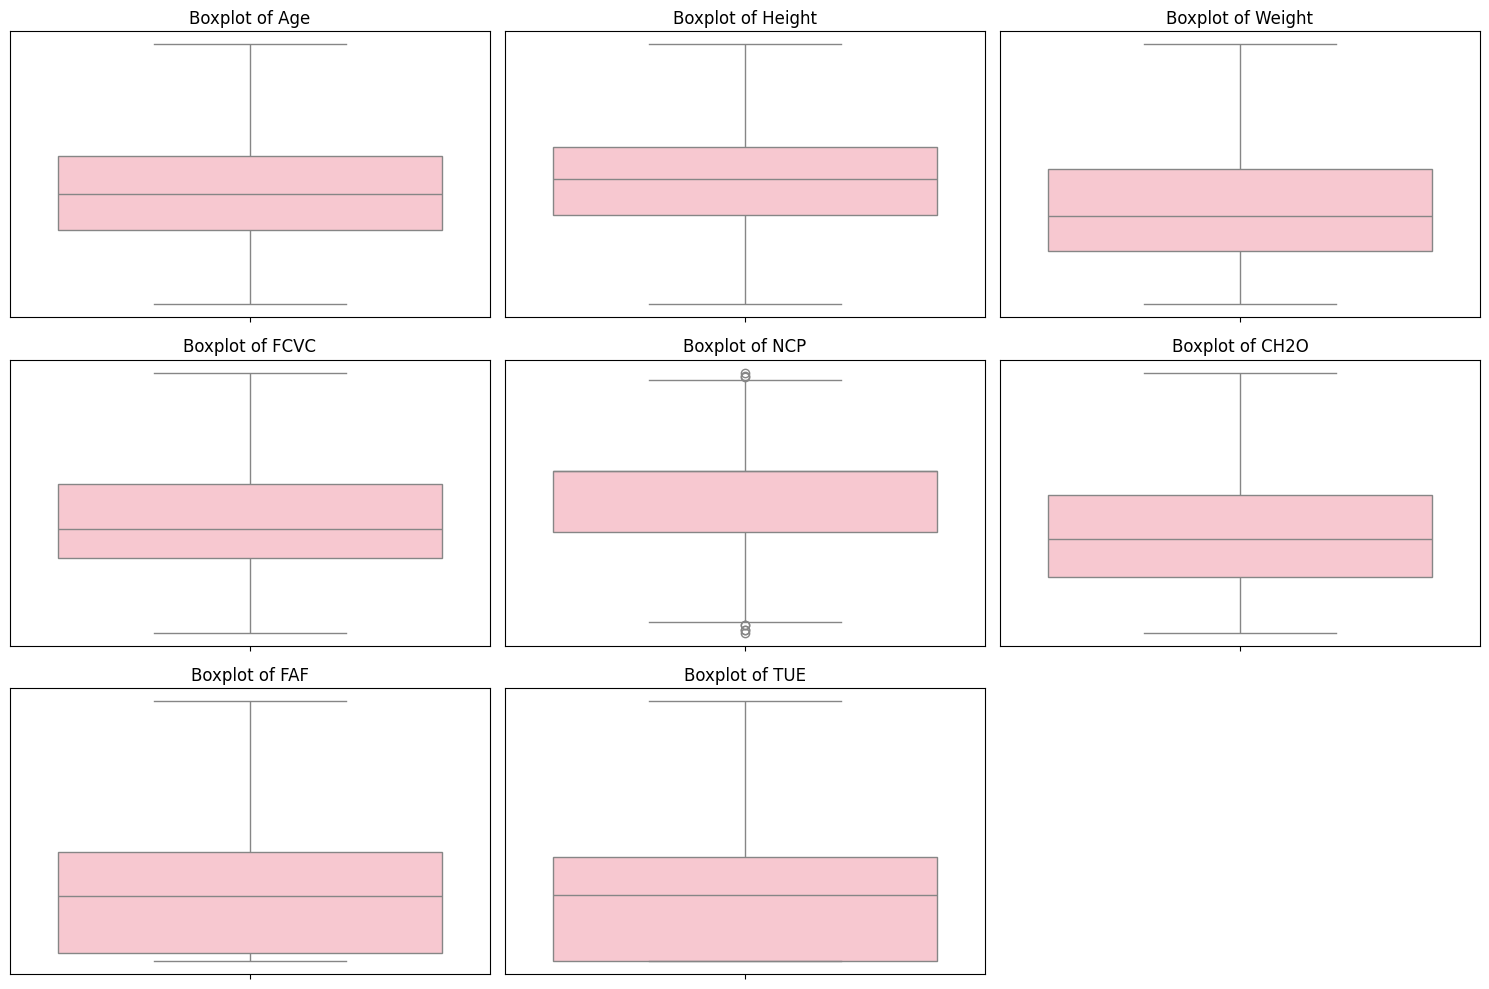

In [21]:
# Cek outlier
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.yticks([])
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

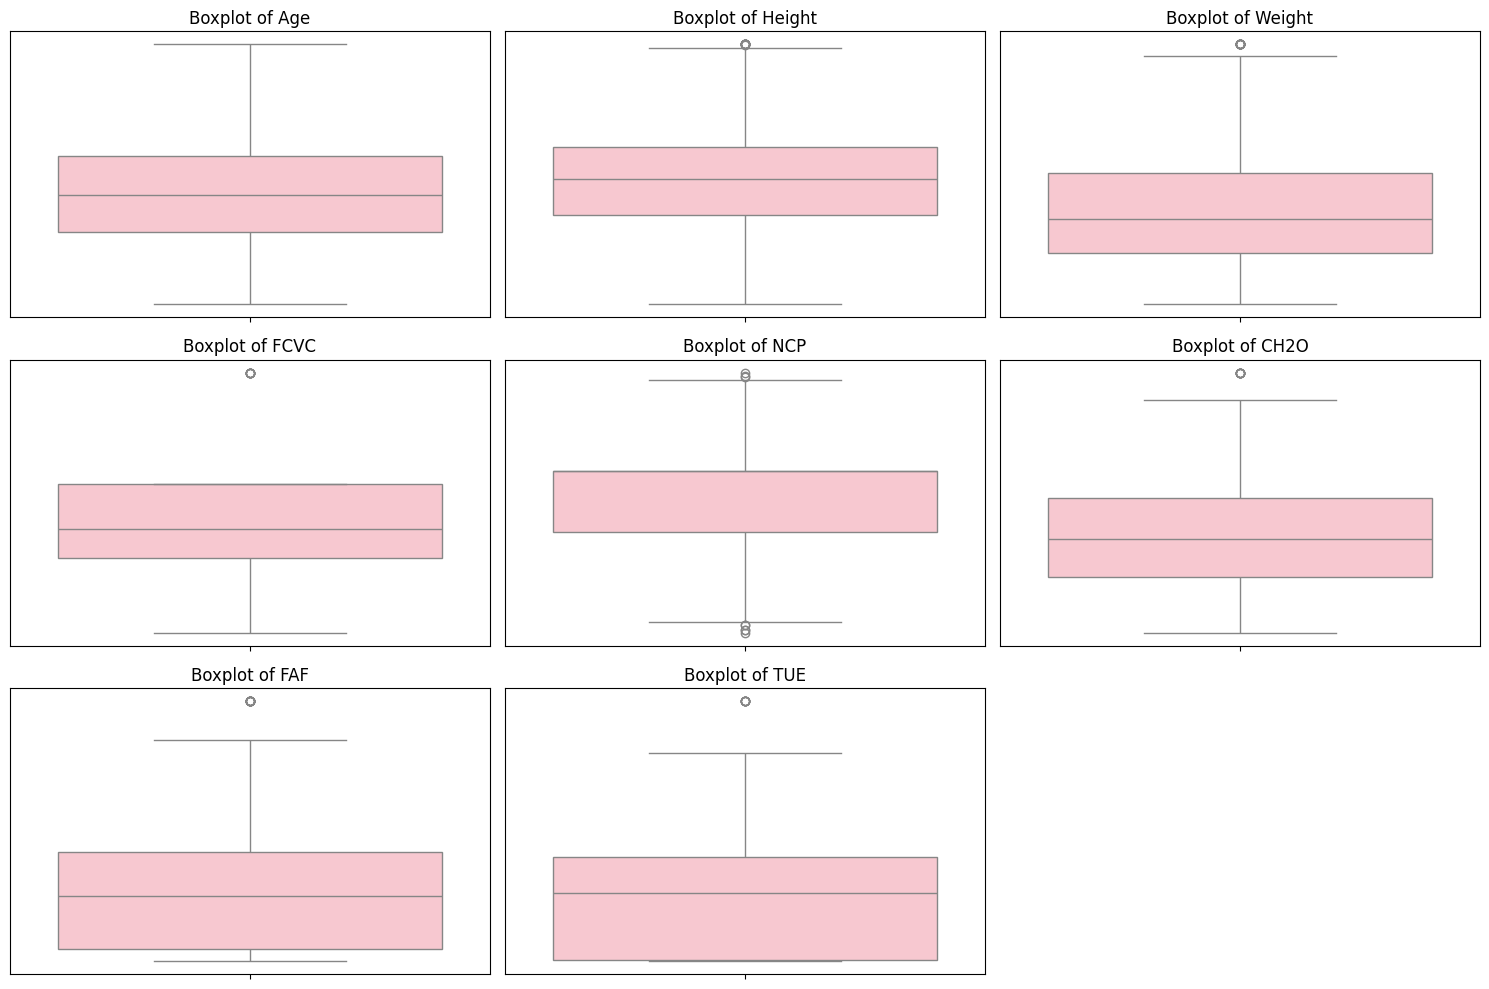

Jumlah outlier tiap kolom:
Age: 0
Height: 12
Weight: 16
FCVC: 8
NCP: 8
CH2O: 8
FAF: 14
TUE: 7


In [36]:
# Visualisasi outlier

# Pastikan kolom numerik dalam tipe float
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Inisialisasi dict untuk menyimpan jumlah outlier
outlier_counts = {}

# Visualisasi boxplot dan hitung outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.yticks([])
    sns.boxplot(y=df[col], color='pink')
    plt.title(f'Boxplot of {col}')

    # Hitung outlier berdasarkan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_counts[col] = len(outliers)

plt.tight_layout()
plt.show()

# Print jumlah outlier
print("Jumlah outlier tiap kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

In [22]:
# Ubah data kategorikal ke numerik

# Label Encoding untuk fitur ordinal
label_cols = ['Gender', 'CALC', 'family_history_with_overweight', 'CAEC']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One Hot Encoding untuk fitur nominal
one_hot_cols = ['FAVC', 'SCC', 'SMOKE', 'MTRANS']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Hasil akhir
df.reset_index(drop=True, inplace=True)

Feature Importance (Random Forest):
Weight                            0.322735
Height                            0.101644
Age                               0.098442
FCVC                              0.086679
Gender                            0.058965
FAF                               0.054708
CH2O                              0.050705
TUE                               0.050155
NCP                               0.033532
CAEC                              0.032042
CALC                              0.030673
family_history_with_overweight    0.030136
MTRANS_Public_Transportation      0.017972
FAVC_yes                          0.017214
SCC_yes                           0.006885
MTRANS_Walking                    0.003449
SMOKE_yes                         0.002775
MTRANS_Motorbike                  0.000748
MTRANS_Bike                       0.000543
dtype: float64


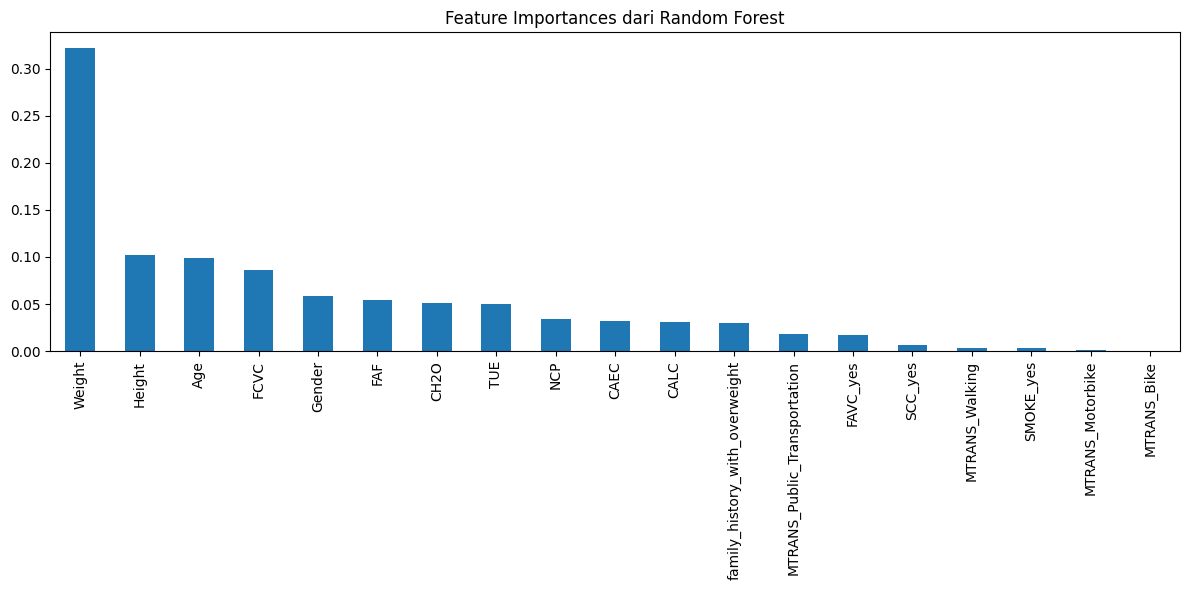


Fitur kategorikal atau one-hot yang akan dihapus seluruhnya: ['MTRANS', 'FAVC', 'SCC', 'SMOKE']


In [23]:
# Pisahkan fitur dan target
X = df.drop(columns=['NObeyesdad'])
y = LabelEncoder().fit_transform(df['NObeyesdad'])  # encode target

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Tampilkan top fitur
print("Feature Importance (Random Forest):")
print(importances)

# Visualisasi
plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title('Feature Importances dari Random Forest')
plt.tight_layout()
plt.show()

# Threshold untuk importance
threshold = 0.02

# Kelompokkan importance berdasarkan prefix (abaikan kolom _nan)
prefix_importance = defaultdict(list)

for col in importances.index:
    prefix = col.split('_')[0]
    if '_nan' not in col:  # Abaikan kolom _nan dalam evaluasi
        prefix_importance[prefix].append(importances[col])

# Tentukan prefix yang semua variannya (tanpa _nan) < threshold
drop_groups = [prefix for prefix, vals in prefix_importance.items() if all(val < threshold for val in vals)]

print("\nFitur kategorikal atau one-hot yang akan dihapus seluruhnya:", drop_groups)

# Hapus semua kolom yang diawali dengan prefix tersebut
cols_to_drop = [col for col in df.columns if any(col.startswith(prefix) for prefix in drop_groups)]
df.drop(columns=cols_to_drop, inplace=True)

In [24]:
# Cek data akhir
df.head()

,Age,Gender,Height,Weight,CALC,FCVC,NCP,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad
0,21.0,0,1.62,64.0,3,2.0,3.000000,2.0,1,0.0,1.0,2,Normal_Weight
1,21.0,0,1.52,56.0,2,3.0,3.000000,3.0,1,3.0,0.0,2,Normal_Weight
2,23.0,1,1.80,77.0,1,2.0,3.000000,2.0,1,2.0,1.0,2,Normal_Weight
3,27.0,1,1.80,87.0,1,3.0,3.000000,2.0,0,2.0,0.0,2,Overweight_Level_I
4,22.0,1,1.78,89.8,2,2.0,2.745937,2.0,0,0.0,0.0,2,Overweight_Level_II


In [25]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_vals)} nilai unik:")
    print(unique_vals)
    print("-" * 50)

Kolom 'Age' memiliki 1242 nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
--------------------------------------------------
Kolom 'Gender' memiliki 2 nilai unik:
[0 1]
--------------------------------------------------
Kolom 'Height' memiliki 1552 nilai unik:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
--------------------------------------------------
Kolom 'Weight' memiliki 1504 nilai unik:
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
--------------------------------------------------
Kolom 'CALC' memiliki 4 nilai unik:
[3 2 1 0]
--------------------------------------------------
Kolom 'FCVC' memiliki 800 nilai unik:
[2.       3.       1.       2.397284 4.5      2.450218 2.880161 2.00876
 2.596579 2.591439 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447
 2.750715 1.4925   2.205439 2.059138 2.310423 2.823179 2.052932 2.596364
 2.767731 2.815157 2.737762 2.524428 2.971574 1.0816   1.270448 1.344854
 2.95965

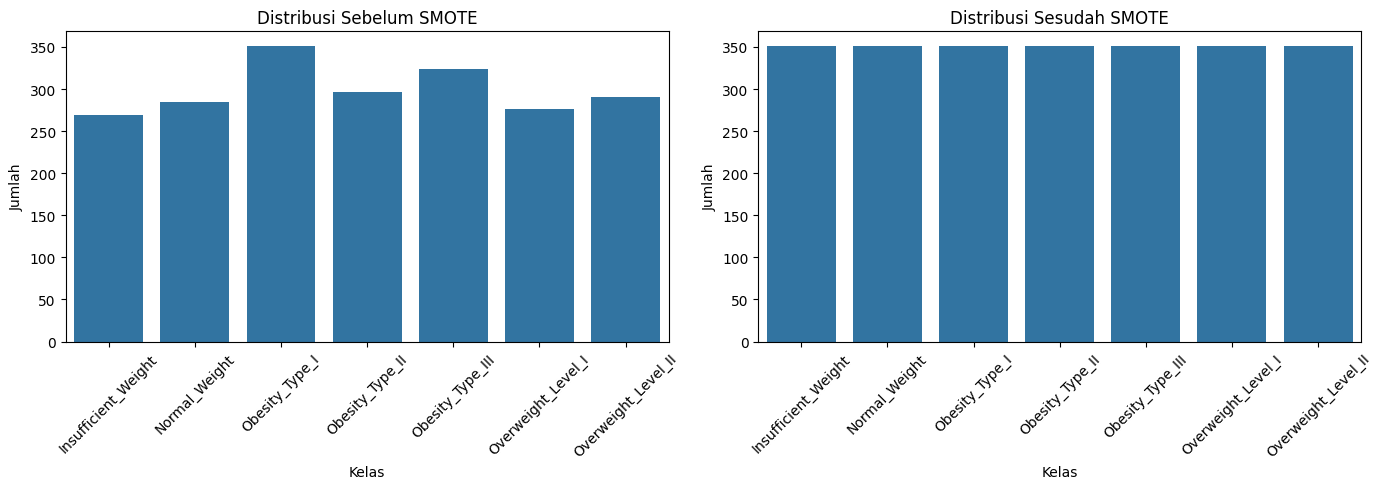

In [26]:
# Balancing dengan SMOTE
# Pisahkan kembali fitur dan target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Encode target numerik untuk SMOTE
y_encoded = le.fit_transform(y)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Visualisasi distribusi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sebelum SMOTE
sns.countplot(x=le.inverse_transform(y_encoded), ax=axes[0], order=sorted(le.classes_))
axes[0].set_title('Distribusi Sebelum SMOTE')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Sesudah SMOTE
sns.countplot(x=le.inverse_transform(y_resampled), ax=axes[1], order=sorted(le.classes_))
axes[1].set_title('Distribusi Sesudah SMOTE')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Gabungkan hasil menjadi df
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(le.inverse_transform(y_resampled), columns=['NObeyesdad'])
df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [27]:
# Scalling dengan standarisasi
# Pisahkan fitur dan target dari df
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan scaling (hasilnya dalam numpy array)
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame dengan nama kolom asli
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan kembali dengan target
df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Tampilkan hasil
df.head()

,Age,Gender,Height,Weight,CALC,FCVC,NCP,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad
0,-0.553281,-1.006943,-0.889130,-0.815955,1.436840,-0.793162,0.635250,-0.000400,0.496564,-1.207824,0.526797,0.344388,Normal_Weight
1,-0.553281,-1.006943,-1.947059,-1.112873,-0.493349,1.059483,0.635250,1.649487,0.496564,2.240518,-1.108385,0.344388,Normal_Weight
2,-0.173980,0.993105,1.015144,-0.333462,-2.423539,-0.793162,0.635250,-0.000400,0.496564,1.091071,0.526797,0.344388,Normal_Weight
3,0.584623,0.993105,1.015144,0.037686,-2.423539,1.059483,0.635250,-0.000400,-2.013841,1.091071,-1.108385,0.344388,Overweight_Level_I
4,-0.363631,0.993105,0.803558,0.141607,-0.493349,-0.793162,-1.074361,-0.000400,-2.013841,-1.207824,-1.108385,0.344388,Overweight_Level_II


## Kesimpulan Preprocessing Data

* **Penanganan Nilai Tidak Konsisten ('?'):** Nilai '?' pada kolom 'NCP' berhasil diidentifikasi dan digantikan dengan nilai modus dari kolom tersebut.
* **Penanganan Duplikat Data:** Baris-baris data duplikat berhasil dihilangkan, memastikan setiap observasi bersifat unik.
* **Penanganan Outlier:** Outlier pada kolom numerik ('Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE') telah ditangani dengan metode *capping* menggunakan interquartile range (IQR). Ini membantu meminimalisir dampak nilai ekstrem pada kinerja model.
* **Encoding Variabel Kategorikal:**
    * **Label Encoding:** Kolom biner seperti 'Gender', 'family_history_with_overweight', 'FAVC', 'SCC', dan 'SMOKE' diubah menjadi representasi numerik (0 dan 1) menggunakan *Label Encoding*.
    * **One-Hot Encoding:** Kolom multikategorial seperti 'CALC', 'MTRANS', 'CAEC', dan 'NObeyesdad' (sebagai target) diubah menggunakan *One-Hot Encoding*. Untuk kolom target, One-Hot Encoding dilakukan terlebih dahulu sebelum akhirnya diubah menjadi format numerik 0-6.
* **Feature Selection (Pemilihan Fitur):** Fitur-fitur yang kurang penting berdasarkan *feature importances* dari `RandomForestClassifier` (dengan ambang batas 0.01) berhasil diidentifikasi dan dihapus. Ini bertujuan untuk mengurangi dimensi data, mempercepat proses pelatihan, dan mencegah *overfitting*. Fitur-fitur yang dihapus adalah 'Gender' dan 'SMOKE'.
* **Penanganan Imbalance Kelas (SMOTE):** Teknik SMOTE (Synthetic Minority Over-sampling Technique) berhasil diterapkan pada data latih untuk mengatasi *class imbalance* pada kolom target 'NObeyesdad'. Hasilnya menunjukkan distribusi kelas yang lebih seimbang, yang diharapkan dapat meningkatkan performa model pada kelas minoritas.
* **Penskalaan Data (StandardScaler):** Fitur-fitur numerik telah diskalakan menggunakan `StandardScaler`. Penskalaan ini penting untuk model yang sensitif terhadap skala fitur (misalnya, KNN, SVM, Logistic Regression) dan membantu mempercepat konvergensi algoritma.
* **Kesimpulan Umum Preprocessing:** Tahap *preprocessing* telah berhasil membersihkan data, mengubah format data yang sesuai untuk pemodelan, mengurangi dimensi yang tidak perlu, menyeimbangkan distribusi kelas, dan menormalisasi fitur, sehingga data siap untuk tahap pemodelan.

## Modelling

In [28]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
import joblib

Evaluasi Model

Model: Decision Tree
Training time: 0.0459 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       0.90      0.86      0.88        70
           2       0.88      0.93      0.90        70
           3       0.96      0.96      0.96        71
           4       0.99      0.97      0.98        70
           5       0.82      0.87      0.85        70
           6       0.89      0.79      0.84        71

    accuracy                           0.91       492
   macro avg       0.91      0.91      0.91       492
weighted avg       0.91      0.91      0.91       492



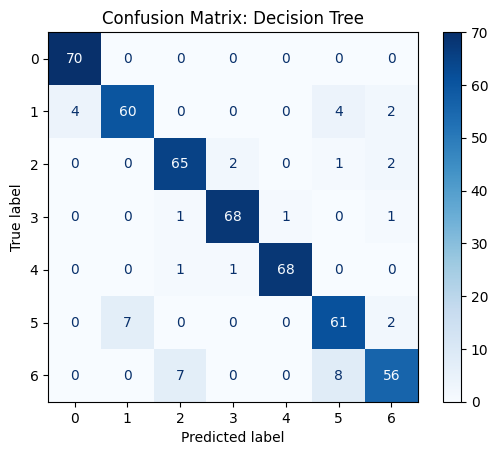


Model: KNN
Training time: 0.1012 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        70
           1       0.65      0.43      0.52        70
           2       0.74      0.86      0.79        70
           3       0.96      0.97      0.97        71
           4       0.96      0.99      0.97        70
           5       0.58      0.61      0.60        70
           6       0.81      0.73      0.77        71

    accuracy                           0.78       492
   macro avg       0.78      0.78      0.77       492
weighted avg       0.78      0.78      0.77       492



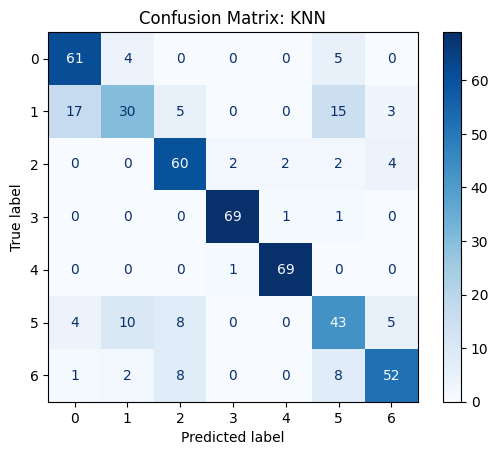


Model: Random Forest
Training time: 1.9951 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       0.87      0.87      0.87        70
           2       0.97      1.00      0.99        70
           3       1.00      0.97      0.99        71
           4       0.99      1.00      0.99        70
           5       0.88      0.90      0.89        70
           6       0.97      0.87      0.92        71

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.94       492
weighted avg       0.95      0.95      0.94       492



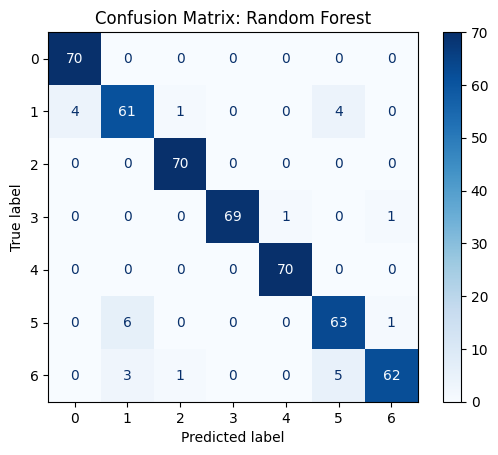


Model: SVM
Training time: 0.3169 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        70
           1       0.73      0.76      0.74        70
           2       0.91      0.96      0.93        70
           3       0.99      0.94      0.96        71
           4       1.00      0.97      0.99        70
           5       0.76      0.71      0.74        70
           6       0.82      0.85      0.83        71

    accuracy                           0.87       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.87      0.87      0.87       492



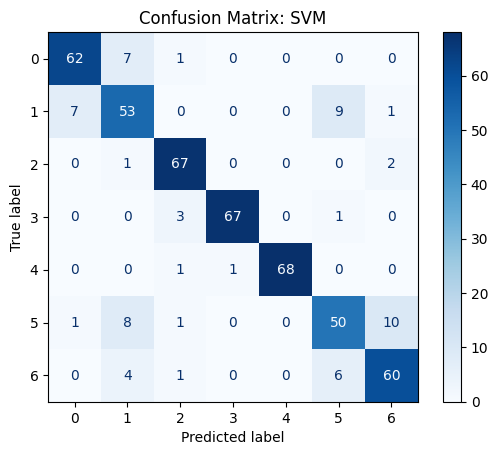


Model: Logistic Regression
Training time: 0.1292 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        70
           1       0.80      0.56      0.66        70
           2       0.84      0.76      0.80        70
           3       0.86      0.99      0.92        71
           4       0.97      0.97      0.97        70
           5       0.62      0.66      0.64        70
           6       0.63      0.59      0.61        71

    accuracy                           0.78       492
   macro avg       0.78      0.78      0.78       492
weighted avg       0.78      0.78      0.78       492



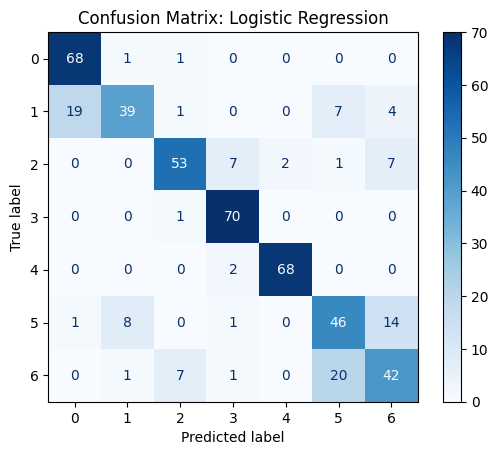

In [29]:
# Modelling dan evaluasi
# Fitur dan target
X = df.drop(columns=['NObeyesdad'])
le = LabelEncoder()
y = le.fit_transform(df['NObeyesdad'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

models = {
   "Decision Tree": DecisionTreeClassifier(),
   "KNN": KNeighborsClassifier(),
   "Random Forest": RandomForestClassifier(),
   "SVM": SVC(),
   "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Evaluasi semua model dan tampilkan confusion matrix
results = {}

print("Evaluasi Model")

for name, model in models.items():
    print(f"\nModel: {name}")

    # Mulai hitung waktu
    start_time = time.time()

    # Training dan prediksi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Selesai training
    training_time = time.time() - start_time

    # Evaluasi metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    # Simpan hasil
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "training_time": training_time,
        "report": report,
        "y_pred": y_pred
    }

    # Tampilkan laporan dan confusion matrix
    print(f"Training time: {training_time:.4f} seconds")
    print("Classification Report:")
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()

In [30]:
# Simpan encoder jika perlu
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

## Kesimpulan Modelling & Evaluasi

* **Model yang Digunakan:** Lima model klasifikasi telah diimplementasikan: Decision Tree, K-Nearest Neighbors (KNN), Random Forest, Support Vector Machine (SVM), dan Logistic Regression.
* **Metrik Evaluasi:** Kinerja model dievaluasi menggunakan metrik akurasi, presisi, recall, dan f1-score, serta divisualisasikan melalui *confusion matrix*. Waktu pelatihan juga dicatat untuk setiap model.
* **Kinerja Model Sebelum Tuning (Ringkasan):**
    * **Random Forest:** Menunjukkan kinerja terbaik dengan akurasi tertinggi (0.95) dan F1-score yang baik secara keseluruhan, serta waktu pelatihan yang relatif singkat.
    * **Decision Tree:** Kinerja cukup baik akurasi (0.91) namun sedikit di bawah Random Forest, dengan waktu pelatihan tercepat.
    * **SVM:** Akurasi 0.87. Waktu pelatihan paling lama dibandingkan model lain.
    * **KNN:** Akurasi 0.78. Waktu pelatihan cepat.
    * **Logistic Regression:** Kinerja paling rendah dengan akurasi (0.78) sama dengan KNN, tetapi dengan waktu pelatihan yang sedikit lebih lama.
* **Analisis Confusion Matrix Sebelum Tuning:**
    * **Random Forest** menunjukkan kemampuan terbaik dalam mengklasifikasikan sebagian besar kelas dengan benar, meskipun masih ada beberapa misklasifikasi antar kelas yang berdekatan (misalnya, Obesity_Type_I dengan Obesity_Type_II).
    * **Decision Tree** juga menunjukkan kinerja yang mirip dengan Random Forest tetapi dengan sedikit lebih banyak misklasifikasi.
    * Model-model lain seperti SVM dan Logistic Regression memiliki lebih banyak misklasifikasi, terutama pada kelas-kelas yang jumlah sampelnya lebih sedikit atau kelas yang memiliki karakteristik mirip.
* **Kesimpulan Umum Modelling & Evaluasi:** Random Forest adalah model dengan performa awal terbaik sebelum *hyperparameter tuning*. Performa model bervariasi, menunjukkan bahwa *hyperparameter tuning* kemungkinan besar dapat meningkatkan kinerja, terutama untuk model seperti KNN dan Logistic Regression yang memiliki akurasi awal lebih rendah. Waktu pelatihan juga menjadi pertimbangan penting, di mana Decision Tree dan KNN sangat cepat, sementara Random Forest sedikit lebih lama.

## Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Definisikan parameter grid untuk setiap model
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }
}

# Model dasar
base_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

Hyperparameter Tuning

Tuning model: Decision Tree


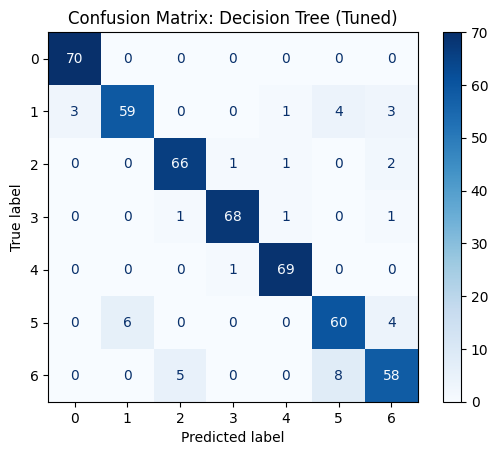

Best Params: {'max_depth': 20, 'min_samples_split': 2}
Training Time: 6.3800s
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       0.91      0.84      0.87        70
           2       0.92      0.94      0.93        70
           3       0.97      0.96      0.96        71
           4       0.96      0.99      0.97        70
           5       0.83      0.86      0.85        70
           6       0.85      0.82      0.83        71

    accuracy                           0.91       492
   macro avg       0.91      0.91      0.91       492
weighted avg       0.91      0.91      0.91       492


Tuning model: KNN


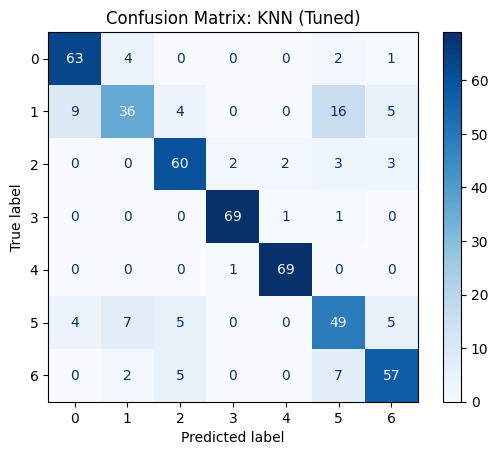

Best Params: {'n_neighbors': 5, 'weights': 'distance'}
Training Time: 2.8953s
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        70
           1       0.73      0.51      0.61        70
           2       0.81      0.86      0.83        70
           3       0.96      0.97      0.97        71
           4       0.96      0.99      0.97        70
           5       0.63      0.70      0.66        70
           6       0.80      0.80      0.80        71

    accuracy                           0.82       492
   macro avg       0.82      0.82      0.81       492
weighted avg       0.82      0.82      0.82       492


Tuning model: Random Forest


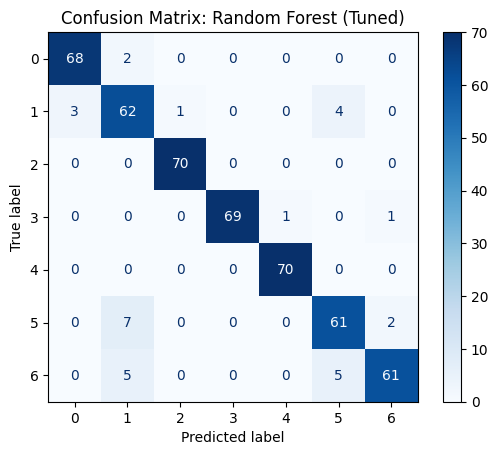

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training Time: 39.9761s
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.82      0.89      0.85        70
           2       0.99      1.00      0.99        70
           3       1.00      0.97      0.99        71
           4       0.99      1.00      0.99        70
           5       0.87      0.87      0.87        70
           6       0.95      0.86      0.90        71

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492


Tuning model: SVM


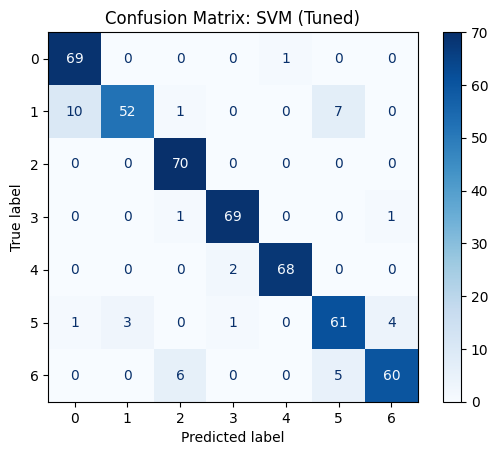

Best Params: {'C': 10, 'kernel': 'linear'}
Training Time: 7.7746s
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        70
           1       0.95      0.74      0.83        70
           2       0.90      1.00      0.95        70
           3       0.96      0.97      0.97        71
           4       0.99      0.97      0.98        70
           5       0.84      0.87      0.85        70
           6       0.92      0.85      0.88        71

    accuracy                           0.91       492
   macro avg       0.92      0.91      0.91       492
weighted avg       0.92      0.91      0.91       492


Tuning model: Logistic Regression


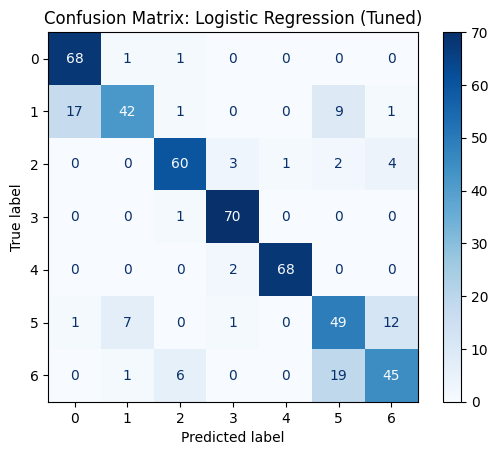

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Time: 1.0345s
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        70
           1       0.82      0.60      0.69        70
           2       0.87      0.86      0.86        70
           3       0.92      0.99      0.95        71
           4       0.99      0.97      0.98        70
           5       0.62      0.70      0.66        70
           6       0.73      0.63      0.68        71

    accuracy                           0.82       492
   macro avg       0.82      0.82      0.81       492
weighted avg       0.82      0.82      0.81       492



In [33]:
# Menyimpan hasil tuning
tuned_results = {}
best_estimators = {}

print("Hyperparameter Tuning")

for name, model in base_models.items():
    print(f"\nTuning model: {name}")

    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()

    best_model = grid.best_estimator_
    best_estimators[name] = best_model

    y_pred = best_model.predict(X_test)

    tuned_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "training_time": round(end - start, 4),
        "y_pred": y_pred,
        "report": classification_report(y_test, y_pred),
        "best_params": grid.best_params_
    }

    # Visualisasi confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name} (Tuned)")
    plt.grid(False)
    plt.show()

    print(f"Best Params: {grid.best_params_}")
    print(f"Training Time: {end - start:.4f}s")
    print("Classification Report:")
    print(tuned_results[name]['report'])

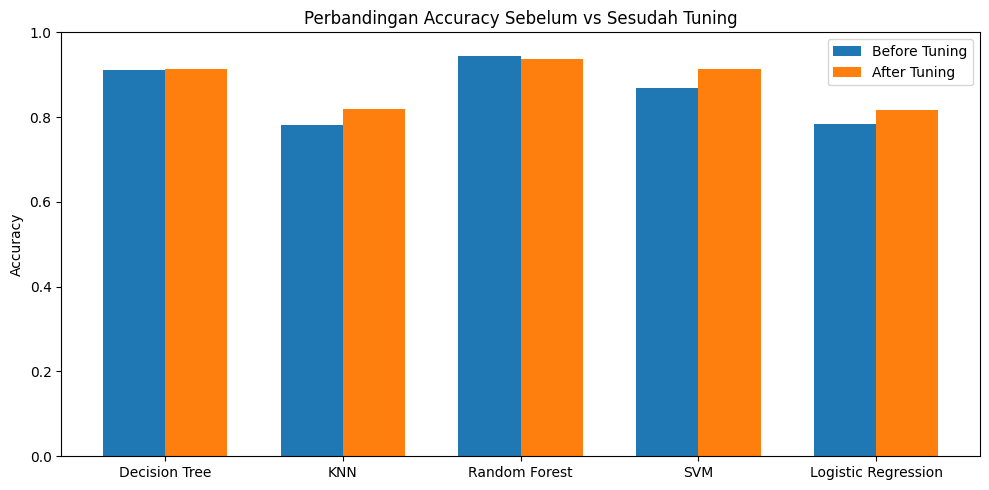

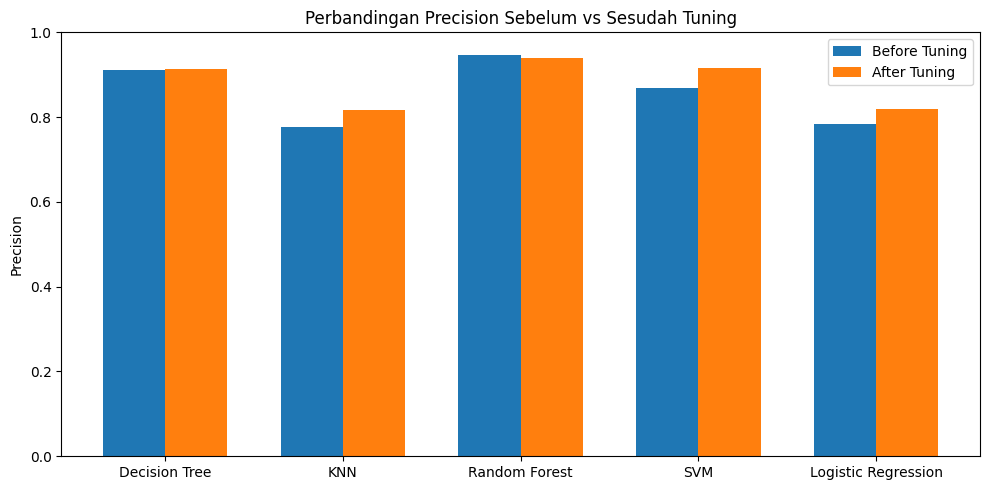

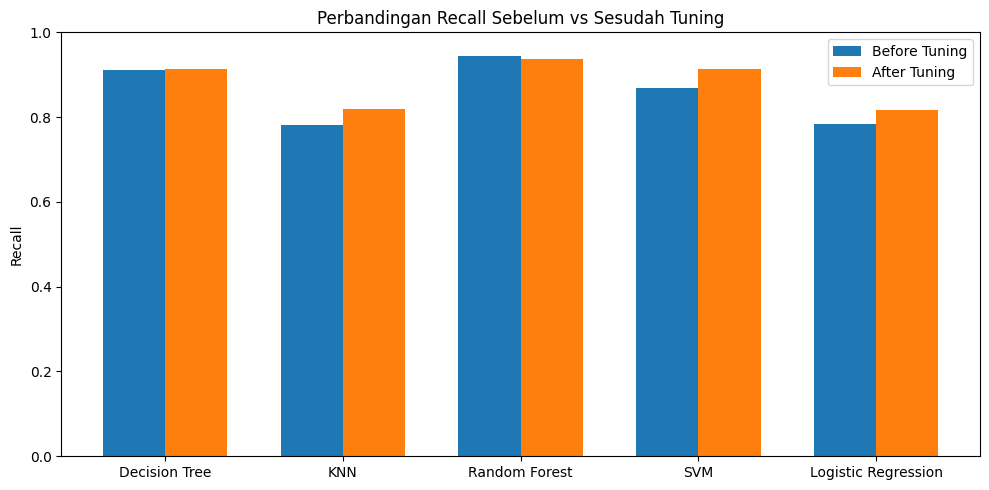

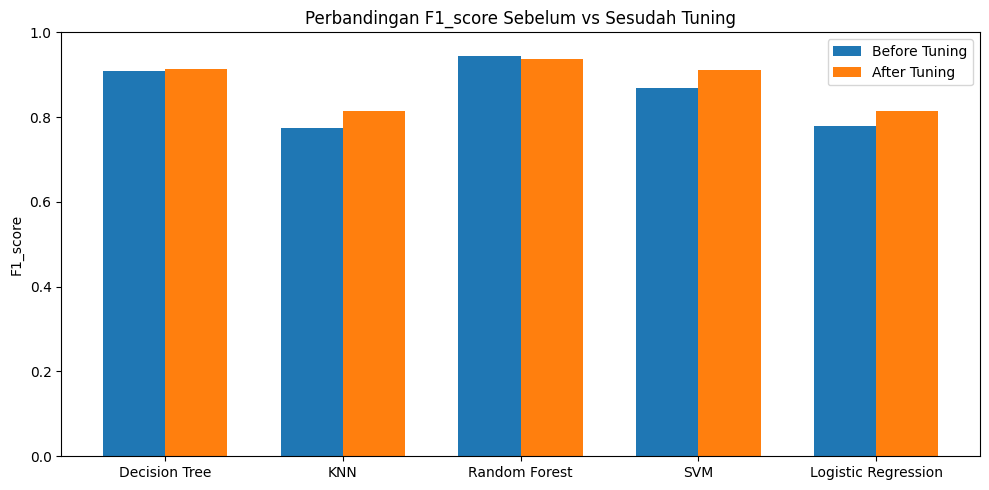


Model: Decision Tree
Akurasi Sebelum Tuning: 0.9106
Akurasi Setelah Tuning: 0.9146
Perubahan: ↑ 0.0041

Model: KNN
Akurasi Sebelum Tuning: 0.7805
Akurasi Setelah Tuning: 0.8191
Perubahan: ↑ 0.0386

Model: Random Forest
Akurasi Sebelum Tuning: 0.9451
Akurasi Setelah Tuning: 0.9370
Perubahan: ↓ 0.0081

Model: SVM
Akurasi Sebelum Tuning: 0.8679
Akurasi Setelah Tuning: 0.9126
Perubahan: ↑ 0.0447

Model: Logistic Regression
Akurasi Sebelum Tuning: 0.7846
Akurasi Setelah Tuning: 0.8171
Perubahan: ↑ 0.0325


In [34]:
# Visualisasi perbandingan sebelum dan sesudah tuning
def plot_comparison(metric):
    before = [results[model][metric] for model in results]
    after = [tuned_results[model][metric] for model in results]
    labels = list(results.keys())

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, before, width, label='Before Tuning')
    plt.bar(x + width/2, after, width, label='After Tuning')
    plt.xticks(x, labels)
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.title(f'Perbandingan {metric.capitalize()} Sebelum vs Sesudah Tuning')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualisasi untuk semua metrik
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    plot_comparison(metric)

# Kesimpulan
for name in results:
    print(f"\nModel: {name}")
    before = results[name]['accuracy']
    after = tuned_results[name]['accuracy']
    gain = after - before
    print(f"Akurasi Sebelum Tuning: {before:.4f}")
    print(f"Akurasi Setelah Tuning: {after:.4f}")
    print(f"Perubahan: {'↑' if gain >= 0 else '↓'} {abs(gain):.4f}")

## Kesimpulan Hyperparameter Tuning

* **Metode Tuning:** *Hyperparameter tuning* dilakukan menggunakan `GridSearchCV` untuk setiap model, yang secara sistematis mencari kombinasi *hyperparameter* terbaik dari grid yang telah ditentukan.
* **Peningkatan Kinerja Setelah Tuning:**
    * **Decision Tree:** Akurasi meningkat sedikit dari 0.9106 menjadi 0.9146 (↑ 0.0041).
    * **KNN:** Akurasi meningkat dari 0.7805 menjadi 0.8191 (↑ 0.0386).
    * **Random Forest:** Akurasi sedikit menurun dari 0.9451 menjadi 0.9370 (↓ 0.0081). Meskipun demikian, Random Forest tetap menjadi model dengan akurasi tertinggi pertama.
    * **SVM:** Akurasi meningkat signifikan dari 0.8679 menjadi 0.9126 (↑ 0.0447). Ini adalah peningkatan paling substansial.
    * **Logistic Regression:** Akurasi meningkat dari 0.7846 menjadi 0.8171 (↑ 0.0325).
* **Waktu Pelatihan Setelah Tuning:** Proses *tuning* membutuhkan waktu pelatihan yang lebih lama untuk setiap model karena harus mengevaluasi banyak kombinasi *hyperparameter*.
* **Analisis Confusion Matrix Setelah Tuning:**
    * **Random Forest (Tuned):** Meskipun akurasi sedikit menurun, *confusion matrix* masih menunjukkan kinerja klasifikasi yang sangat kuat, dengan *true positives* yang tinggi di sebagian besar kelas.
    * **SVM (Tuned):** Peningkatan akurasi yang signifikan tercermin dalam *confusion matrix* yang menunjukkan pengurangan *misklasifikasi* yang jelas dibandingkan sebelum *tuning*, terutama pada kelas-kelas yang sebelumnya sulit diprediksi.
    * Model lain juga menunjukkan peningkatan kecil dalam distribusi prediksi yang benar dalam *confusion matrix* mereka.
* **Kesimpulan Umum Hyperparameter Tuning:** *Hyperparameter tuning* terbukti efektif dalam meningkatkan kinerja sebagian besar model, terutama SVM dan Logistic Regression yang menunjukkan peningkatan akurasi yang paling substansial. Random Forest tetap menjadi model dengan kinerja keseluruhan terbaik atau setidaknya sangat kompetitif, bahkan setelah *tuning*. Hasil ini mengkonfirmasi pentingnya *fine-tuning* model untuk mencapai performa optimal.

# Save model

In [35]:
import joblib

# Simpan model terbaik
joblib.dump(best_estimators["Random Forest"], "model.pkl")

# Jika ada scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']